# GRIP : The Sparks Foundation

## Data Science and Business Analytics Internship

## Author : Arya Chauhan

## Task 1 : Prediction Using Supervised ML

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. The task has two variables where the feature is the no. of hours studied and the target value is the percentage score. This can be solved using simple linear regression.

### 1. Importing the dataset

In [63]:
# Importing required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

In [64]:
# Reading data from remote link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

##### Exploring Data

In [65]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [66]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 2. Visualizing the dataset

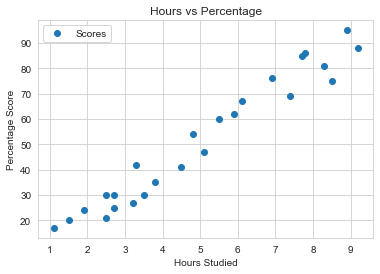

In [82]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [69]:
data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [70]:
data.corr(method = 'spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [71]:
hours = data['Hours']
scores = data['Scores']

<AxesSubplot:xlabel='Hours', ylabel='Density'>

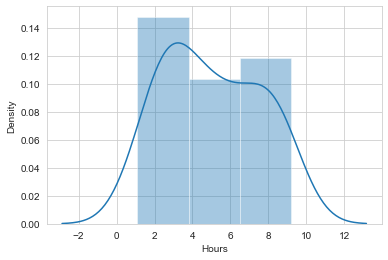

In [72]:
sns.distplot(hours)

<AxesSubplot:xlabel='Scores', ylabel='Density'>

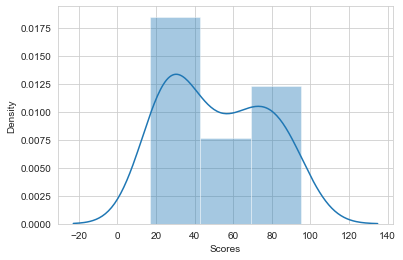

In [73]:
sns.distplot(scores)

### 3. Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [74]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [75]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50) 

### 4. Training the Algorithm

In [76]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression()

### 5. Visualizing the model

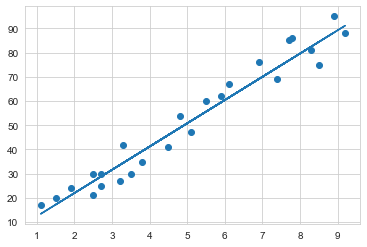

In [77]:
m = reg.coef_
c = reg.intercept_
line = m*X+c

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### 6. Making Predictions

In [78]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]]


In [79]:
# Comparing Actual vs Predicted
actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
actual_predicted

,Actual,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


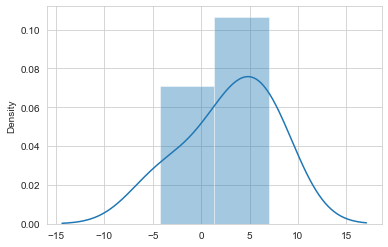

In [80]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

In [81]:
h = 9.25
s = reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {} % in exam.".format(h,s))

If a student studies for 9.25 hours per day he/she will score [91.56986604] % in exam.


### 7. Evaluating the model


In [58]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 Score: ',r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score:  0.971014141329942
